<a href="https://colab.research.google.com/github/ctotti/INPE_Disciplinas/blob/main/Relatorio_CEA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import zipfile
import os
import pandas as pd
import gdown
import matplotlib.pyplot as plt

In [86]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Arquivo do drive com medições realizadas em laboratório [aqui](https://drive.google.com/drive/folders/1Cq6e_cFMjdLmWZD37XqYfd2VUfVCoIFi?usp=drive_link).

## FOV & IFOV

In [ ]:
h = 17.78   # altura: 17.78 cm ou 7 polegadas

## ÁGUA

## Placa Água
Medições da placa utilizadas como ref. para todas as medições dos alvos de água.

Diretório: [7_Placa_50](https://drive.google.com/drive/folders/1VqBShMpw3w1DPtHujIKKOPv07oG8xdIr?usp=drive_link)

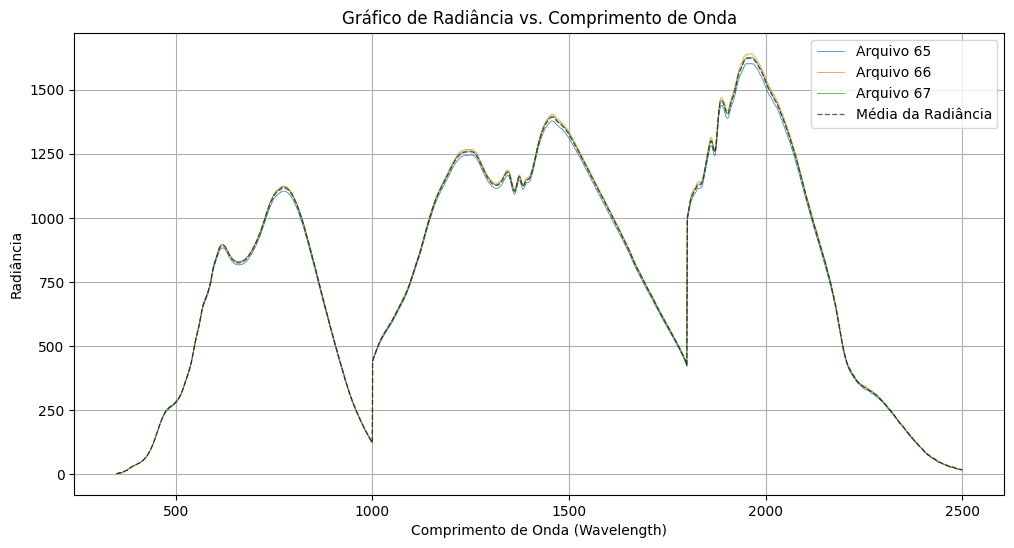

In [87]:
import gdown
# MEDIÇÕES DA PLACA DE REFERÊNCIA PARA ÁGUA ========================================================================================================
# OBTENDO ARQUIVOS ---------------------------------------------------------------------------------------------------------------------------------
# Lista de URLs dos arquivos de texto no Google Drive
urls = [
    'https://drive.google.com/uc?id=1a5vLN2xpvf1J9HMf9ImJcoLkMvgtMY6O', # 65 = https://drive.google.com/file/d/1a5vLN2xpvf1J9HMf9ImJcoLkMvgtMY6O/view?usp=drive_link
    'https://drive.google.com/uc?id=1oVdtt_CYwaesANY3E_NdeDMTjhMo-T-t', # 66 = https://drive.google.com/file/d/1oVdtt_CYwaesANY3E_NdeDMTjhMo-T-t/view?usp=drive_link
    'https://drive.google.com/uc?id=1oeMwBY0noYR0l-qjRHpX0c61r2woUTFy'  # 67 = https://drive.google.com/file/d/1oeMwBY0noYR0l-qjRHpX0c61r2woUTFy/view?usp=drive_link
]

# Nomes dos arquivos locais correspondentes
files = ['placa50_65.txt', 'placa50_66.txt', 'placa50_67.txt']

# Loop para fazer o download e processamento de cada arquivo
data_frames = []
for url, file in zip(urls, files):
    # Fazer o download do arquivo de texto do Google Drive
    gdown.download(url, file, quiet=True)

    # Ler o arquivo de texto e converter para dataframe do pandas
    data = pd.read_csv(file, delimiter='\t')
    data_frames.append(data)

# MÉDIA RADIÂNCIA --------------------------------------------------------------------------------------------------------------------------------
# Calcular a média da radiância
AguaPlaca_MR = pd.DataFrame()
AguaPlaca_MR['Wavelength'] = data_frames[0]['Wavelength']

sufixos_placa = ['65', '66', '67']

# Adicionar as colunas de radiância para cada dataframe
for data, sufixos_placa in zip(data_frames, sufixos_placa):
    AguaPlaca_MR[f'Radiância_{sufixos_placa}'] = data[f'Turma 1 CEA000{sufixos_placa}.asd']

# Calcular a média das colunas de radiância
AguaPlaca_MR['Radiância_Média'] = AguaPlaca_MR.iloc[:, 1:].mean(axis=1)
# AguaPlaca_MR.head()

# PLOTANDO MEDIÇÕES E MÉDIA DA PLACA PARA ÁGUA -------------------------------------------------------------------------------------------------
# PLOT MEDICÕES RADIÂNCIA E MÉDIA
plt.figure(figsize=(12, 6))

sufixos_placa = ['65', '66', '67']

for sufixo in sufixos_placa:
    plt.plot(AguaPlaca_MR['Wavelength'], AguaPlaca_MR[f'Radiância_{sufixo}'],
             label=f'Arquivo {sufixo}', linewidth=0.5)

# Plotar a média da radiância
plt.plot(AguaPlaca_MR['Wavelength'], AguaPlaca_MR['Radiância_Média'],
         label='Média da Radiância', linewidth=1, color='black', linestyle='--', alpha=0.6)

plt.title('Gráfico de Radiância vs. Comprimento de Onda')
plt.xlabel('Comprimento de Onda (Wavelength)')
plt.ylabel('Radiância')
plt.legend()
plt.grid(True)
plt.show()

## Água 13° alvo: medições 83, 84, 85.
Diretório: [13_agua](https://drive.google.com/drive/folders/1-KEFOO398f42BbJ2BHDgx081eZ37qILC?usp=drive_link)

### Água 13: Importando e Visualizando; Média Radiância; Plot Radiância e Média

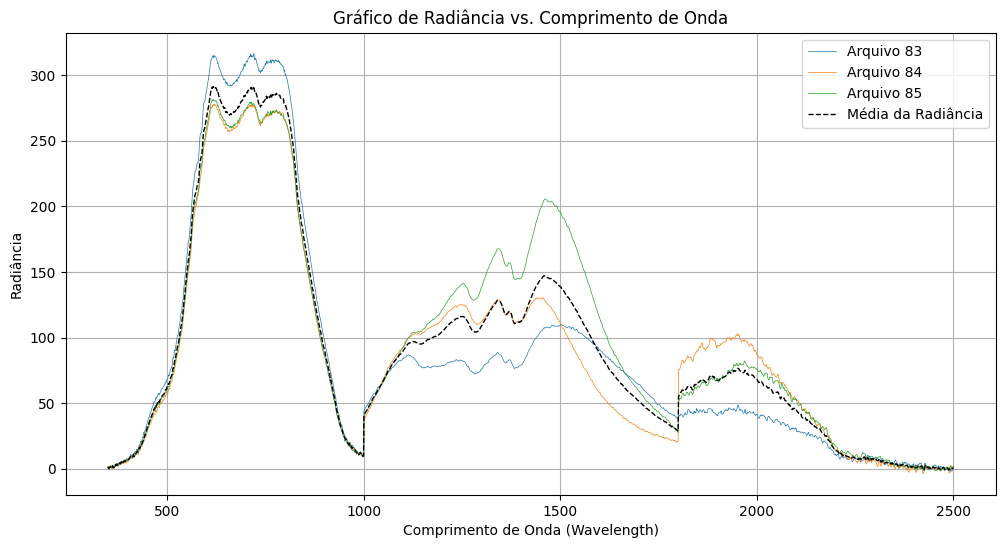

In [93]:
# 13_AGUA:AGUA 11, 12, 13 | IMPORTANDO E VISUALIZANDO ------------------------------------------------------------------------------------------
# Lista de URLs dos arquivos de texto no Google Drive
urls = [
    'https://drive.google.com/uc?id=1xHDcHWAdvLhcF88mu6C0z-DL_AsslCdM', # 83 = https://drive.google.com/file/d/1xHDcHWAdvLhcF88mu6C0z-DL_AsslCdM/view?usp=drive_link
    'https://drive.google.com/uc?id=1gyrXcZb6xYEJY8B5zke-uaJoSxY4cVjX', # 84 = https://drive.google.com/file/d/1gyrXcZb6xYEJY8B5zke-uaJoSxY4cVjX/view?usp=drive_link
    'https://drive.google.com/uc?id=11MvVQfT0V34a9L8388IxaVLqJt9oF_09'  # 85 = https://drive.google.com/file/d/11MvVQfT0V34a9L8388IxaVLqJt9oF_09/view?usp=drive_link
]

# Nomes dos arquivos locais correspondentes
files = ['agua_material83.txt', 'agua_material84.txt', 'agua_material85.txt']

# Loop para fazer o download e processamento de cada arquivo
data_frames = []
for url, file in zip(urls, files):
    # Fazer o download do arquivo de texto do Google Drive
    gdown.download(url, file, quiet=True)

    # Ler o arquivo de texto e converter para dataframe do pandas
    data = pd.read_csv(file, delimiter='\t')
    data_frames.append(data)

# MÉDIA RADIÂNCIA --------------------------------------------------------------------------------------------------------------------------
# Calcular a média da radiância
agua13 = pd.DataFrame()
agua13['Wavelength'] = data_frames[0]['Wavelength']
sufixos = ['83', '84', '85']

# Adicionar as colunas de radiância para cada dataframe
for data, sufixo in zip(data_frames, sufixos):
    agua13[f'Radiância_{sufixo}'] = data[f'Turma 1 CEA000{sufixo}.asd']

# Calcular a média das colunas de radiância
agua13['Radiância_Média'] = agua13.iloc[:, 1:].mean(axis=1)
agua13.head()

# Exibir a média da radiância
# print(agua13[['Wavelength', 'Radiância_Média']])

# PLOT MEDICÕES RADIÂNCIA E MÉDIA ---------------------------------------------------------------------------------------------------------
# Plotar os gráficos sobrepostos e a média
plt.figure(figsize=(12, 6))

for sufixo in sufixos:
    plt.plot(agua13['Wavelength'], agua13[f'Radiância_{sufixo}'],
             label=f'Arquivo {sufixo}', linewidth=0.5)

# Plotar a média da radiância
plt.plot(agua13['Wavelength'], agua13['Radiância_Média'],
         label='Média da Radiância', linewidth=1, color='black', linestyle='--')

plt.title('Gráfico de Radiância vs. Comprimento de Onda')
plt.xlabel('Comprimento de Onda (Wavelength)')
plt.ylabel('Radiância')
plt.legend()
plt.grid(True)
plt.show()


### Água 13: Cálculo do Fator de Reflectância; Plot do Fator de Reflectância

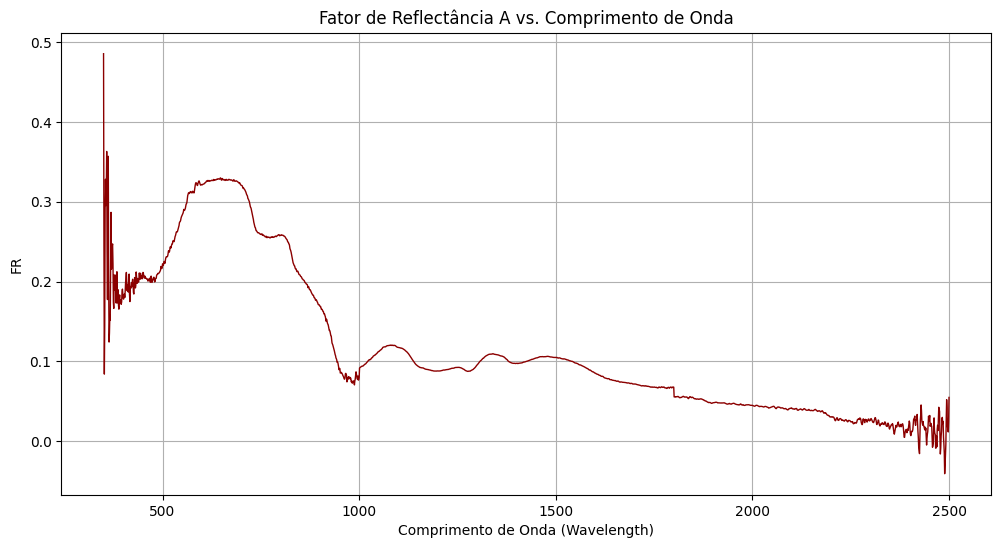

In [95]:
# 2° CÁLCULO DO FATOR DE REFLECTÂNCIA (Radiancia do alvo / radiancia da placa) ----------------------------------------------------------------
# Operação de reflectância
FR_A13 = agua13[['Wavelength']].copy()  # Copia apenas a coluna 'Wavelength' do dataframe original

# Realizar a operação considerando as médias de radiância
FR_A13['FR'] = agua13['Radiância_Média'] / AguaPlaca_MR['Radiância_Média']

# Exibir as primeiras linhas do resultado
# print(FR_A13.head())

# Plotando ------------------------------------------------------------------------------------------------------------------------------------
# Plotar o gráfico
plt.figure(figsize=(12, 6))
plt.plot(FR_A13['Wavelength'], FR_A13['FR'], linestyle='-', color='darkred', linewidth = 1)

plt.title('Fator de Reflectância A vs. Comprimento de Onda')
plt.xlabel('Comprimento de Onda (Wavelength)')
plt.ylabel('FR')
plt.grid(True)
plt.show()

## Água 12° alvo: medições 80, 81, 82

### Água 12: Importando e Visualizando; Média Radiância; Plot Radiância e Média

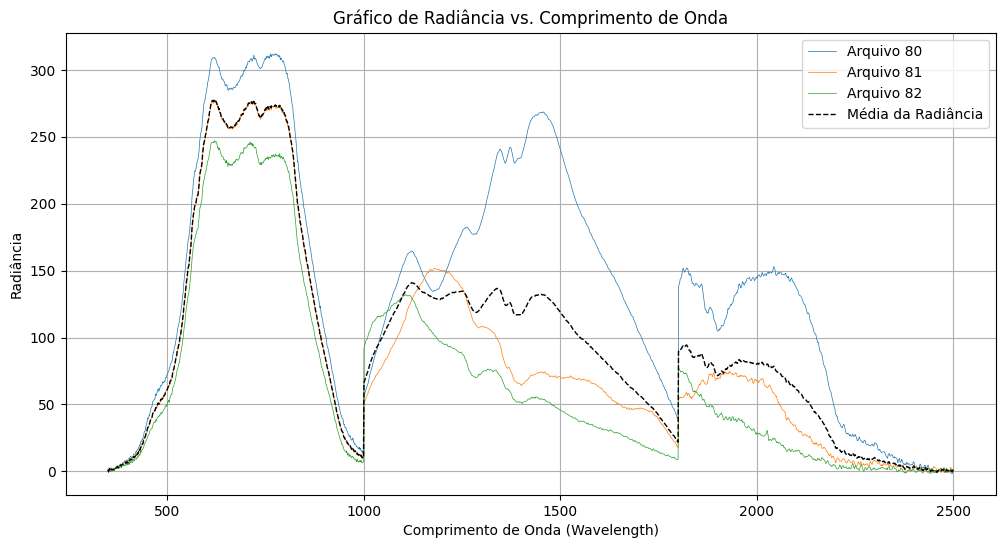

In [97]:
# 13_AGUA:AGUA 11, 12, 13 | IMPORTANDO E VISUALIZANDO ------------------------------------------------------------------------------------------
# Lista de URLs dos arquivos de texto no Google Drive
urls = [
    'https://drive.google.com/uc?id=1JxnucjWJlvte00moiSgO-Pd3R2fNDuf-', # 80 = https://drive.google.com/file/d/1JxnucjWJlvte00moiSgO-Pd3R2fNDuf-/view?usp=drive_link
    'https://drive.google.com/uc?id=1Fb07_YCUDbbskyWYlYpqo--bAc_kDVVo', # 81 = https://drive.google.com/file/d/1Fb07_YCUDbbskyWYlYpqo--bAc_kDVVo/view?usp=drive_link
    'https://drive.google.com/uc?id=1bIwk5YB8p_q0FB1gDl6aN5mRe3LN4FIc'  # 82 = https://drive.google.com/file/d/1bIwk5YB8p_q0FB1gDl6aN5mRe3LN4FIc/view?usp=drive_link
]

# Nomes dos arquivos locais correspondentes
files = ['agua_material83.txt', 'agua_material84.txt', 'agua_material85.txt']

# Loop para fazer o download e processamento de cada arquivo
data_frames = []
for url, file in zip(urls, files):
    # Fazer o download do arquivo de texto do Google Drive
    gdown.download(url, file, quiet=True)

    # Ler o arquivo de texto e converter para dataframe do pandas
    data = pd.read_csv(file, delimiter='\t')
    data_frames.append(data)

# MÉDIA RADIÂNCIA --------------------------------------------------------------------------------------------------------------------------
# Calcular a média da radiância
agua12 = pd.DataFrame()
agua12['Wavelength'] = data_frames[0]['Wavelength']
sufixos = ['80', '81', '82']

# Adicionar as colunas de radiância para cada dataframe
for data, sufixo in zip(data_frames, sufixos):
    agua12[f'Radiância_{sufixo}'] = data[f'Turma 1 CEA000{sufixo}.asd']

# Calcular a média das colunas de radiância
agua12['Radiância_Média'] = agua12.iloc[:, 1:].mean(axis=1)
agua12.head()

# Exibir a média da radiância
# print(agua12[['Wavelength', 'Radiância_Média']])

# PLOT MEDICÕES RADIÂNCIA E MÉDIA ---------------------------------------------------------------------------------------------------------
# Plotar os gráficos sobrepostos e a média
plt.figure(figsize=(12, 6))

for sufixo in sufixos:
    plt.plot(agua12['Wavelength'], agua12[f'Radiância_{sufixo}'],
             label=f'Arquivo {sufixo}', linewidth=0.5)

# Plotar a média da radiância
plt.plot(agua12['Wavelength'], agua12['Radiância_Média'],
         label='Média da Radiância', linewidth=1, color='black', linestyle='--')

plt.title('Gráfico de Radiância vs. Comprimento de Onda')
plt.xlabel('Comprimento de Onda (Wavelength)')
plt.ylabel('Radiância')
plt.legend()
plt.grid(True)
plt.show()


### Água 12: Cálculo do Fator de Reflectância; Plot do Fator de Reflectância

## SOLO

## FOLHAS